<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Image Processing with Numpy
    
    
  <br></p>



In [4]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a numpy array from an image file:</p> 




In [34]:
from skimage import data
import imageio as im

photo_data = im.imread('./wifire/testimage.jpg')

type(photo_data)


imageio.core.util.Array

Let's see what is in this image. 

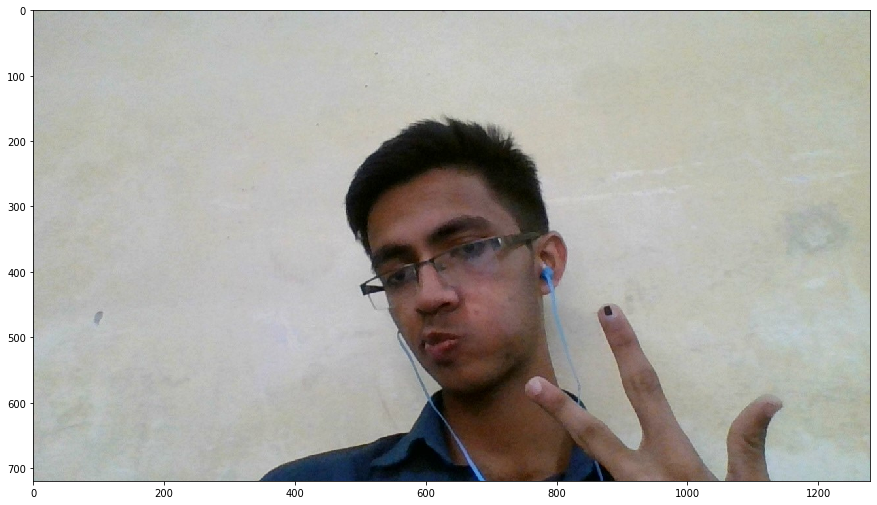

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [12]:
photo_data.shape

#print(photo_data)

(3725, 4797, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [13]:
photo_data.size

53606475

In [14]:
photo_data.min(), photo_data.max()

(0, 255)

In [15]:
photo_data.mean()

75.77772429543259

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [16]:
photo_data[150, 250]

Array([ 15,  42, 233], dtype=uint8)

In [17]:
photo_data[150, 250, 1]

42

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

 photo_data = im.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [11]:
import imageio as im
photo_data = im.imread('./wifire/sd-3layers.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 100
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [13]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [18]:
photo_data[rows_range, cols_range] = 255

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Now let us try something even cooler...a mask that is in shape of a circular disc.

<img src="./1494532821.png" align="left" style="width:550px;height:360px;"/>

In [21]:
total_rows, total_cols, total_layers = photo_data.shape
#print("photo_data = ", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

X =  (3725, 1)  and Y =  (1, 4797)


In [24]:
center_row, center_col = total_rows / 2, total_cols / 2
#print("center_row = ", center_row, "AND center_col = ", center_col)
#print(X - center_row)
#print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
#print(dist_from_center)
radius = (total_rows / 20)**2
#print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
#print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Further Masking</p>
<br/>You can further improve the mask, for example just get upper half disc.

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing of our Satellite Imagery </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

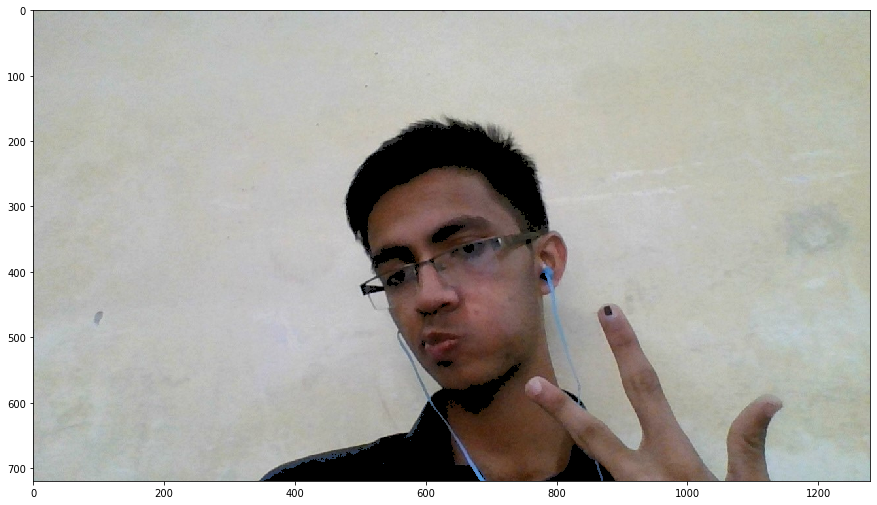

In [42]:
photo_data = im.imread('./wifire/testimage.jpg')
red_mask   = photo_data[:, : ,0] < 40

photo_data[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highl-GREEN Pixels</p>

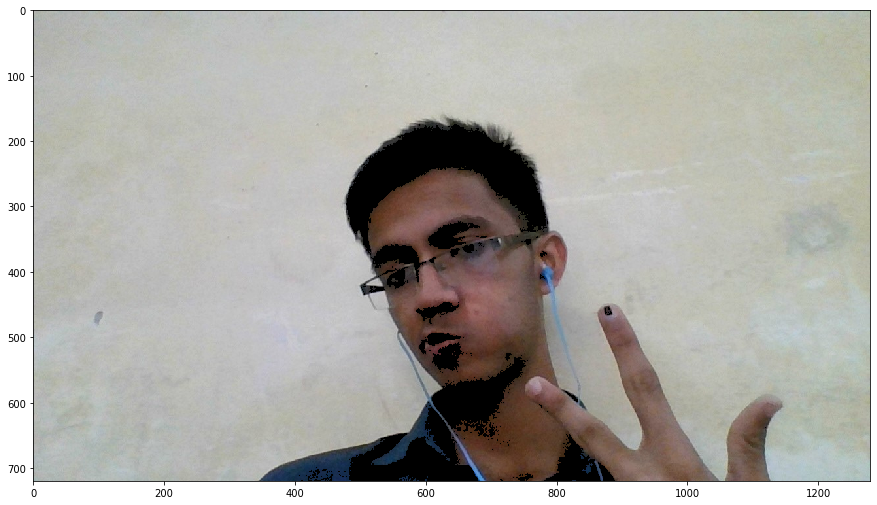

In [54]:
photo_data = im.imread('./wifire/testimage.jpg')
green_mask = photo_data[:, : ,1] < 40

photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-BLUE Pixels</p>

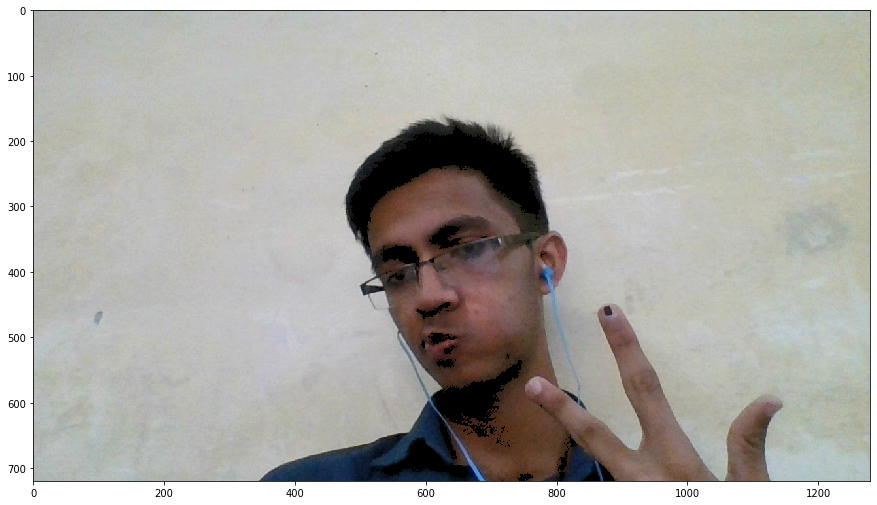

In [56]:
photo_data = im.imread('./wifire/testimage.jpg')
blue_mask  = photo_data[:, : ,2] < 20

photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

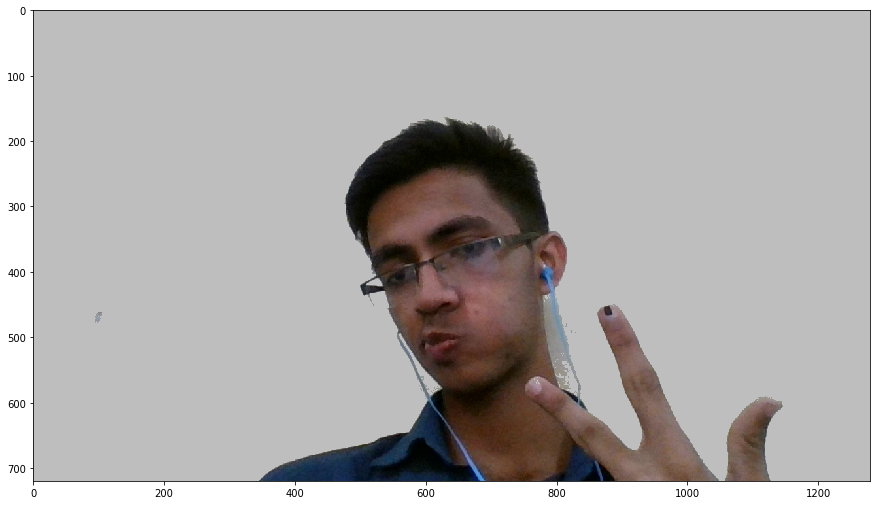

In [60]:
photo_data = im.imread('./wifire/testimage.jpg')

red_mask   = photo_data[:, : ,0] > 150
green_mask = photo_data[:, : ,1] > 150
blue_mask  = photo_data[:, : ,2] > 150

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 190
plt.figure(figsize=(15,15))
plt.imshow(photo_data)